# **IMPORTNG MODULES**

In [2]:
import pandas as pd #for data management
import numpy as np
import seaborn as sns #for EDA
import matplotlib.pyplot as plt #for visualizing the data

# **LOADING THE DATASET**

In [3]:


#dataset from GitHub
GITHUB_CSV_URL = "https://raw.githubusercontent.com/ishanankit17/pokemon-dataset/refs/heads/main/pokemon_data_pokeapi.csv"
df = pd.read_csv(GITHUB_CSV_URL)



# **DATA CLEANING**

In [5]:


#Handling Missing Values
print("\nMissing Values Before:")
print(df.isnull().sum())
df.fillna("NO", inplace=True)  # Forward fill for missing values

#Removing Duplicate Entries
df.drop_duplicates(inplace=True)

#Removing Outliers
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Data Cleaning Completed!")


Missing Values Before:
Name                  0
Pokedex Number        0
Type1                 0
Type2               456
Classification        0
Height (m)            0
Weight (kg)           0
Abilities             0
Generation            0
Legendary Status      0
dtype: int64
Data Cleaning Completed!


# **UNIVARIATE ANALYSIS**


Summary Statistics:
       Pokedex Number  Height (m)  Weight (kg)  Generation
count      798.000000  798.000000   798.000000  798.000000
mean       441.360902    0.941228    32.286967    4.106516
std        261.571426    0.534216    31.918732    2.266428
min          1.000000    0.100000     0.100000    1.000000
25%        210.250000    0.500000     7.525000    2.000000
50%        438.500000    0.800000    21.200000    4.000000
75%        666.750000    1.300000    46.950000    6.000000
max        905.000000    3.000000   136.000000    8.000000

Statistics for Pokedex Number:
Mean: 441.36, Median: 438.50, Mode: 1.00, Variance: 68419.61, Skewness: 0.03

Statistics for Height (m):
Mean: 0.94, Median: 0.80, Mode: 0.60, Variance: 0.29, Skewness: 0.78

Statistics for Weight (kg):
Mean: 32.29, Median: 21.20, Mode: 1.00, Variance: 1018.81, Skewness: 1.27

Statistics for Generation:
Mean: 4.11, Median: 4.00, Mode: 1.00, Variance: 5.14, Skewness: 0.20

Frequency Distribution for Type1:
Type1
W

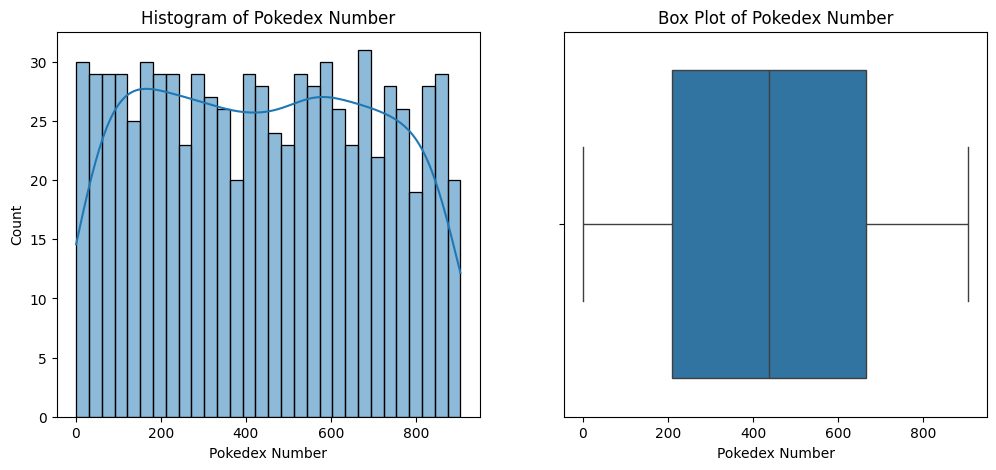

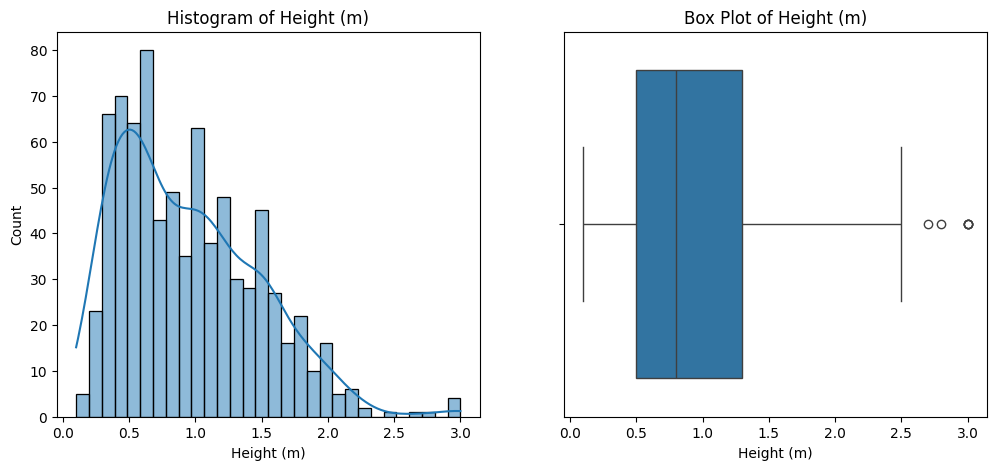

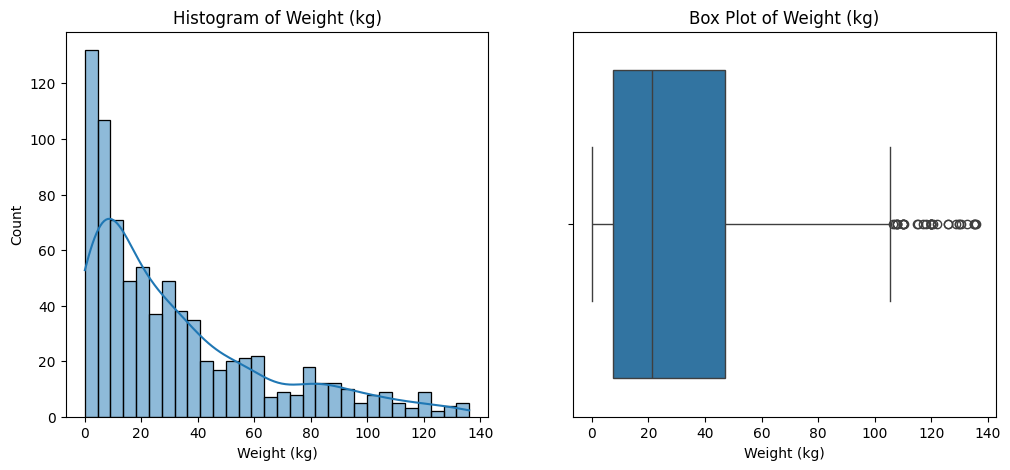

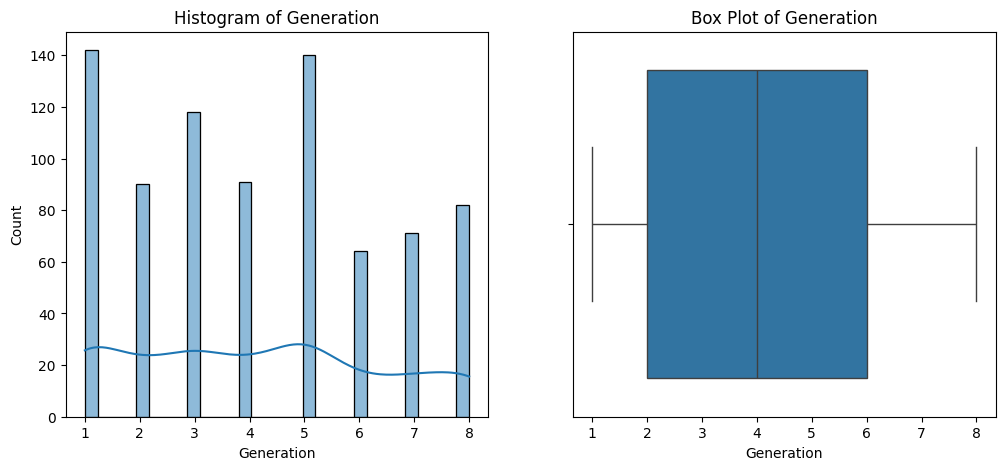

In [6]:
print("\nSummary Statistics:")
print(df.describe())

# Summary statistics (mean, median, mode, variance, skewness)
for col in numeric_cols:
    print(f"\nStatistics for {col}:")
    print(f"Mean: {df[col].mean():.2f}, Median: {df[col].median():.2f}, Mode: {df[col].mode()[0]:.2f}, Variance: {df[col].var():.2f}, Skewness: {df[col].skew():.2f}")

# Frequency distributions for categorical variables
for col in ['Type1', 'Generation', 'Legendary Status',"Type2"]:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts())

# Histograms and Box Plots for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

**Key observations from univariate anlysis:**


1.  Pokedox number is uniformly distributed.
2.  Most of the Pokemons are added in generation 1 and 5.
3. There is a right skewness in height and weight graphs indicating most of the pokemons are smaller.
4. Water, normal and grass type most numerous whereas flying type are relatively small in number.
5. Legendary pokemons are less in number indicating there rarity.




# **Bivariate Analysis**

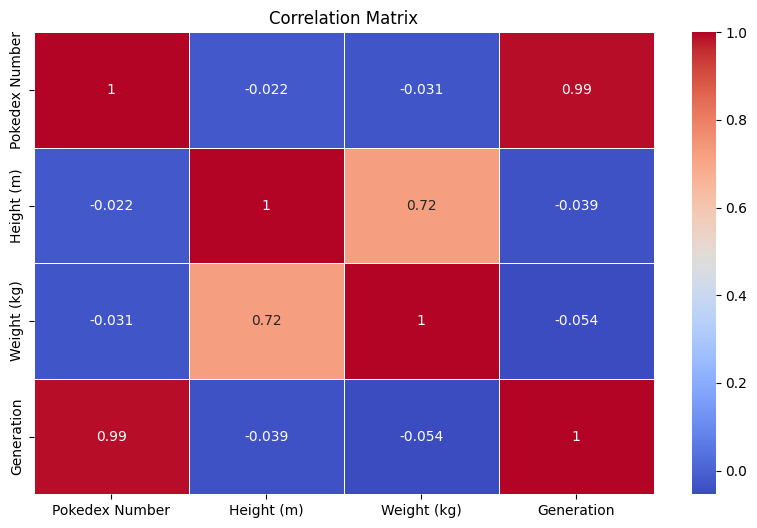

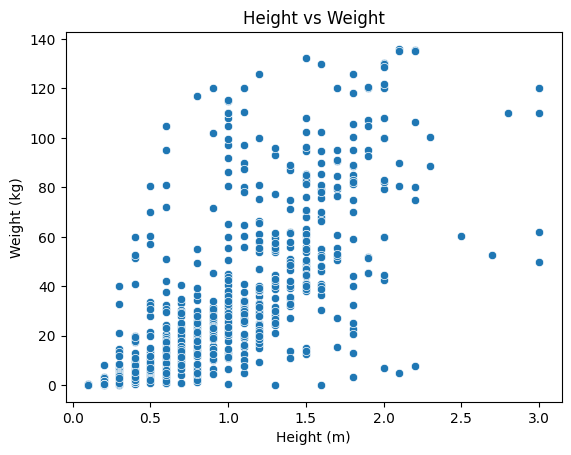

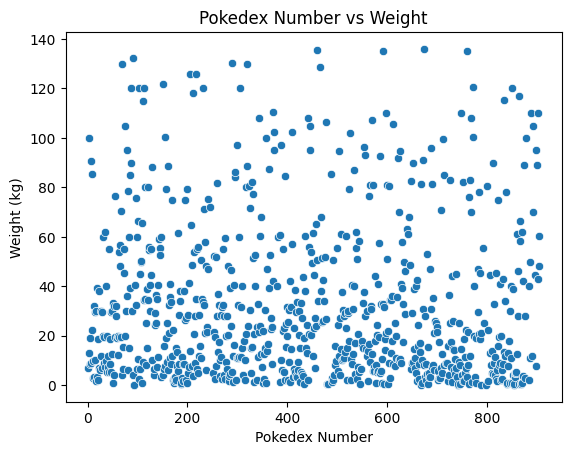

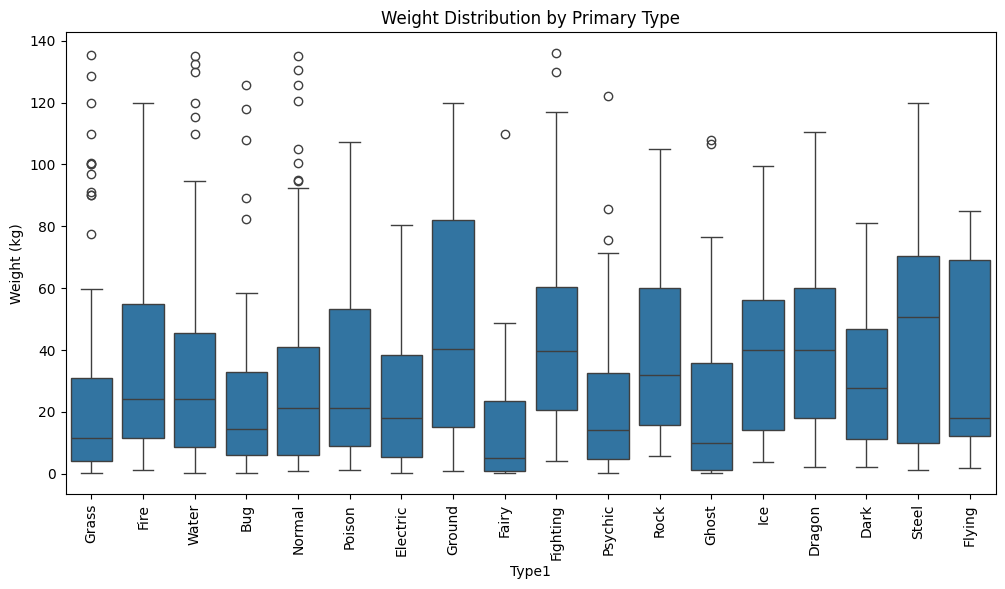

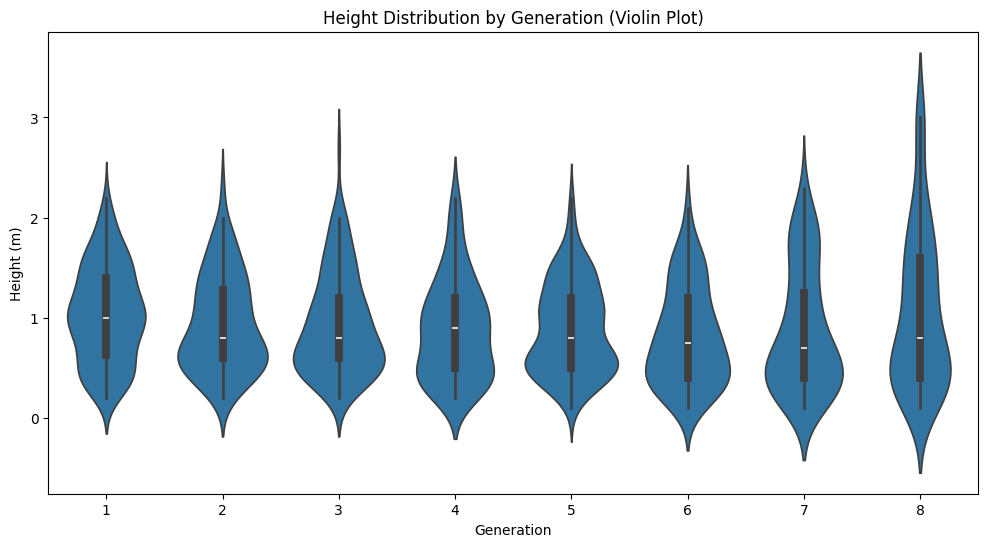

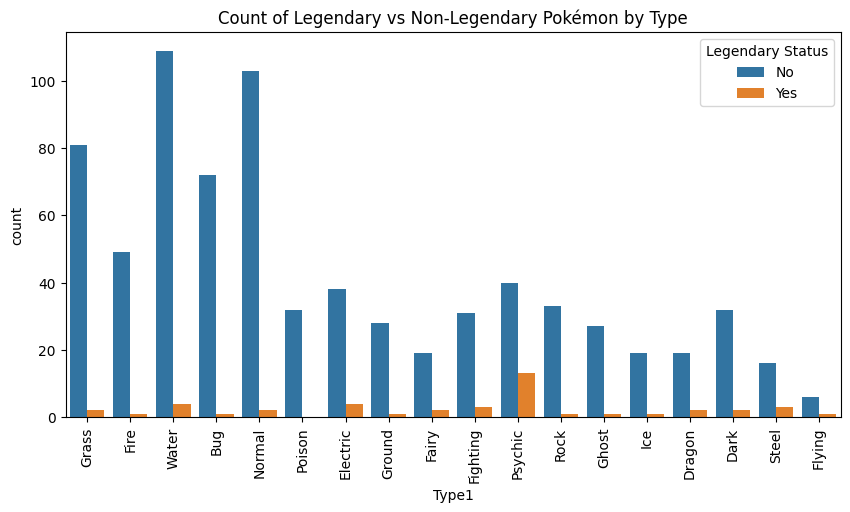

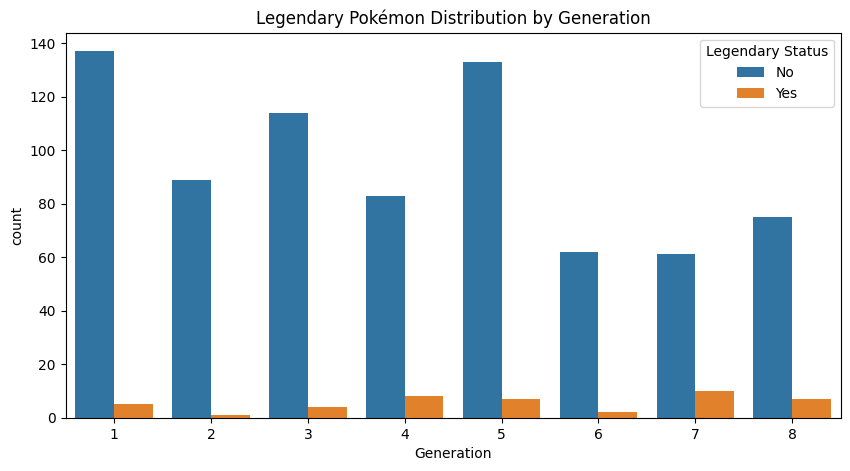

In [7]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Scatter Plots for continuous variables
sns.scatterplot(x=df['Height (m)'], y=df['Weight (kg)'])
plt.title("Height vs Weight")
plt.show()

sns.scatterplot(x=df['Pokedex Number'], y=df['Weight (kg)'])
plt.title("Pokedex Number vs Weight")
plt.show()

# Categorical vs Numerical Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Type1'], y=df['Weight (kg)'])
plt.xticks(rotation=90)
plt.title("Weight Distribution by Primary Type")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Generation'], y=df['Height (m)'])
plt.title("Height Distribution by Generation (Violin Plot)")
plt.show()

# Categorical vs Categorical Analysis
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Type1'], hue=df['Legendary Status'])
plt.xticks(rotation=90)
plt.title("Count of Legendary vs Non-Legendary Pokémon by Type")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x=df['Generation'], hue=df['Legendary Status'])
plt.title("Legendary Pokémon Distribution by Generation")
plt.show()


**Key Observations from bivariate anlysis:**


1.  There is a high correlation between Generation and Pokedox index, i.e 0.99, hinting at indexing on the basis of generation.
2. Further there is a similarly high correlation between weight and height, i.e. 0.72, hinting at a relationship between height and weight.
3. Height Violin plots shows that generation 8 has significant variation in height in respect to other generations.
4. Box Plots reveals significant variation in weight for steel, fighting, fire and ground type pokemons.
5. Legendary pokemon ratio is higher in psychic pokemons and tends to increase in later generations as seen by countplots.




# **Multivariate Analysis**

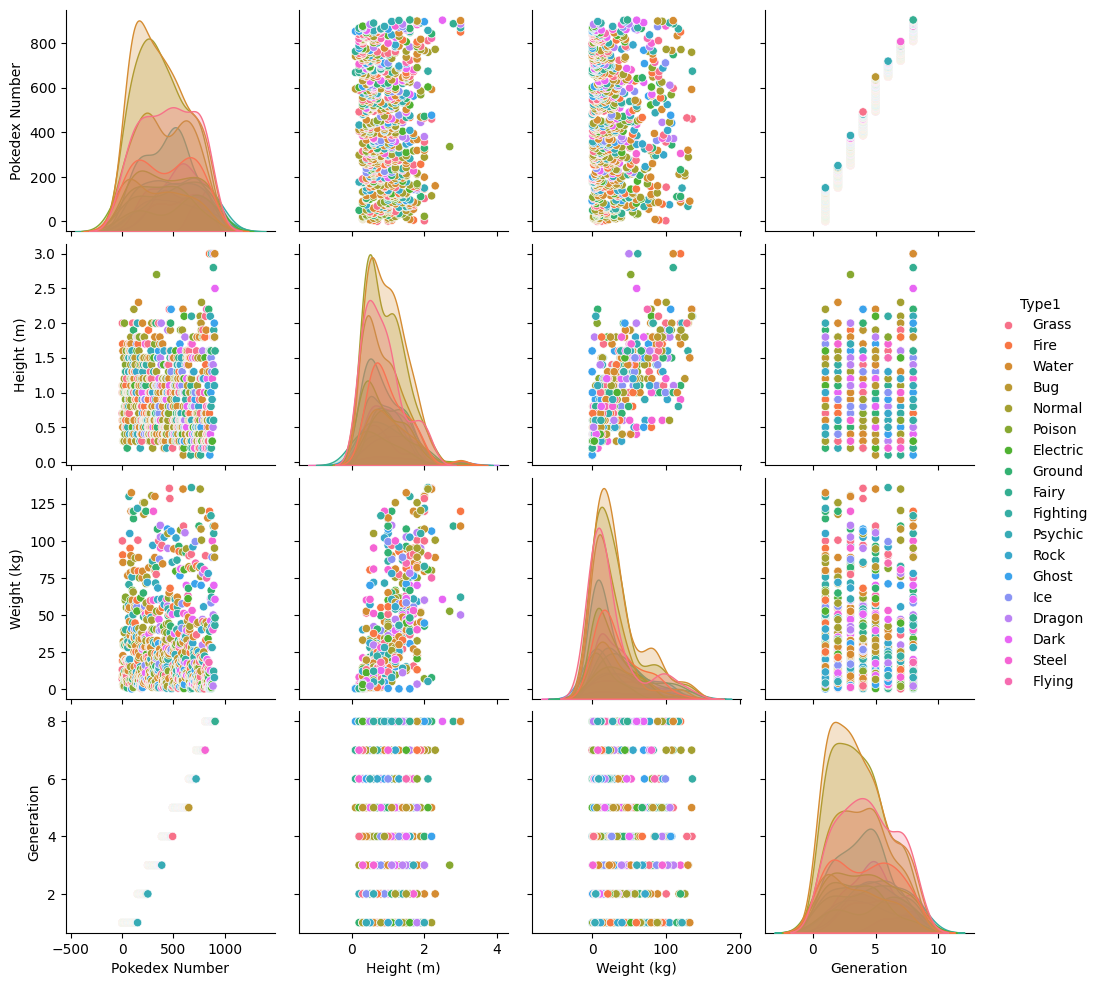

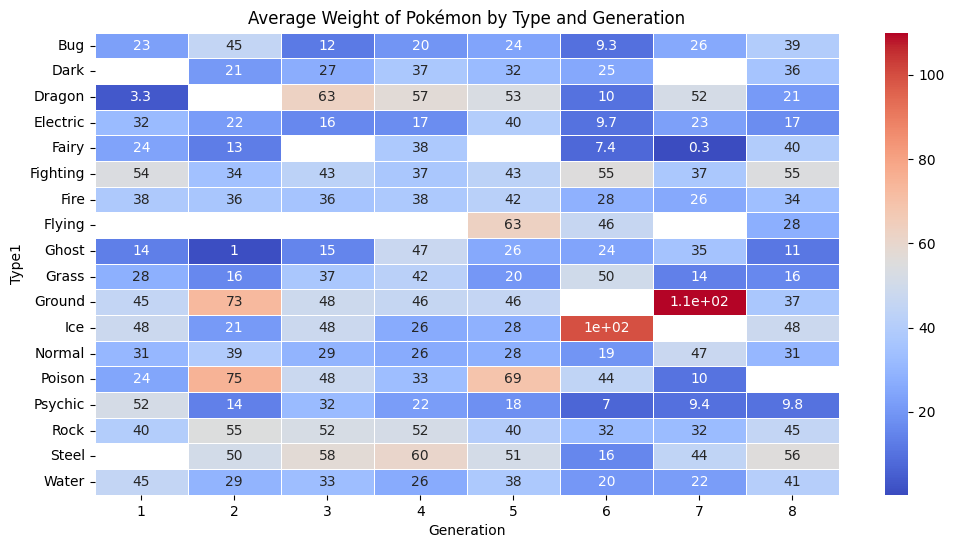

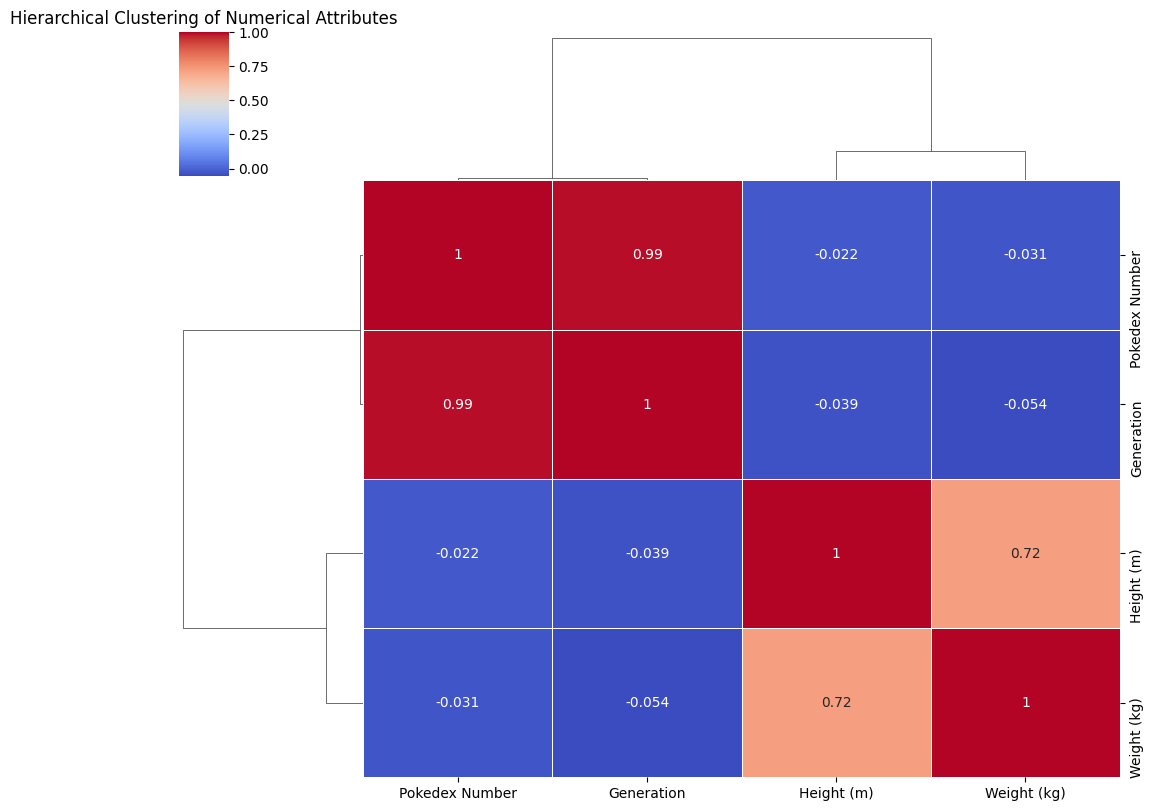

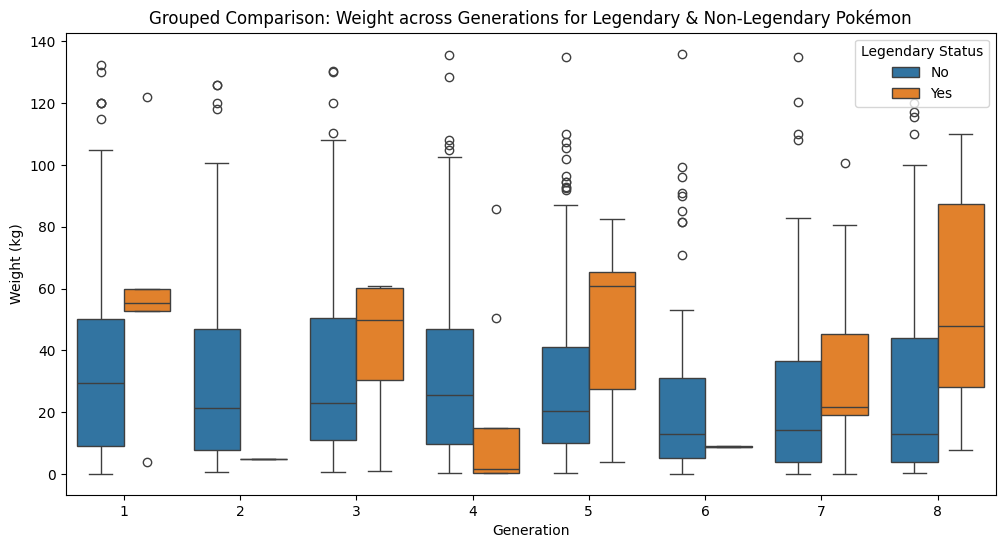


EDA Completed!


In [8]:

# Pairplot
sns.pairplot(df, hue="Type1", vars=numeric_cols)
plt.show()

# Heatmap of Numerical & Categorical Interactions
pivot_table = df.pivot_table(index='Type1', columns='Generation', values='Weight (kg)', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Average Weight of Pokémon by Type and Generation")
plt.show()

# Cluster Map
sns.clustermap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5, figsize=(10, 8))
plt.title("Hierarchical Clustering of Numerical Attributes")
plt.show()

# Grouped Comparisons
plt.figure(figsize=(12, 6))
sns.boxplot(x='Generation', y='Weight (kg)', hue='Legendary Status', data=df)
plt.title("Grouped Comparison: Weight across Generations for Legendary & Non-Legendary Pokémon")
plt.show()

print("\nEDA Completed!")


**Key takeaway from multivariate analysis:**


1.   There is a positive correleation between generation and pokedex index, as evident from the pairplot, no other significant relation can be drawn from them.
2.   There is a significant increase in avg. weight of ground type and ice type in genration 7 and 6 respectively.
3. There is a genral trend of legenday pokemons having average weight than there corresponding counterparts in each generation this trend significantly broke in generation 4.

